## Heart Diseases Predictive Model - Beginners

# Disclaimers
## Authorship 

This notebook has been prepared by **Rishabh Pande** and modified to cope with the purpose of this class. Main modifications were inclusion of extra documentation of the functions and chunks of code, inclusions of references to 3rd part resources. If you are interested on the original file, please have a look at:
https://www.kaggle.com/rishpande/heart-diseases-predictive-model-beginners all credits should be given to [**Rishabh Pande**](https://www.kaggle.com/rishpande/heart-diseases-predictive-model-beginners) for his great work. 

## Liability

The material and information contained on this notebook is for general information and educational purposes only. You should not rely upon the material or information on the notebook as a basis for making any business, legal or any other decisions.

I am not be liable for any false, inaccurate, inappropriate or incomplete information presented on the notebook. Any reliance you place on such material is therefore strictly at your own risk.

## Datasets license

The **Heart Disease UCI** used in this notebook was obtained at Kaggle and originally published by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) no personal data that could be used to identify the subjects were included on the dataset.

Sincerely,

**Adriano Barbosa**

**Context**


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information: 
 1. age 
 2. sex 
 3. chest pain type (4 values) 
 4. resting blood pressure 
 5. serum cholestoral in mg/dl 
 6. fasting blood sugar > 120 mg/dl
 7. resting electrocardiographic results (values 0,1,2)
 8. maximum heart rate achieved 
 9. exercise induced angina 
 10. oldpeak = ST depression induced by exercise relative to rest 
 11. the slope of the peak exercise ST segment 
 12. number of major vessels (0-3) colored by flourosopy 
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [2]:
#Required before starting the next chunks, this takes a little while until the packages are installed.
!pip install -U numpy
!pip install -U pandas
!pip install -U matplotlib
!pip install -U sklearn
!pip install -U seaborn
!pip install -U plotly

     |████████████████████████████████| 20.3MB 3.4MB/s eta 0:00:01��██████████████████▌           | 13.0MB 3.4MB/s eta 0:00:03
     |████████████████████████████████| 10.4MB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 512kB 46.1MB/s eta 0:00:01
     |████████████████████████████████| 13.1MB 3.4MB/s eta 0:00:010:01
     |████████████████████████████████| 71kB 24.9MB/s eta 0:00:01
     |████████████████████████████████| 92kB 29.4MB/s eta 0:00:01
     |████████████████████████████████| 6.7MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 24.3MB/s eta 0:00:01     |███████████████▎                | 12.0MB 24.3MB/s eta 0:00:01
     |████████████████████████████████| 286kB 28.9MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=85f1d7e9998a5afe281631bf674f11c6872871d01732364fd0b75ee5ef774539
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
S

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("./heart-disease-data.csv")

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


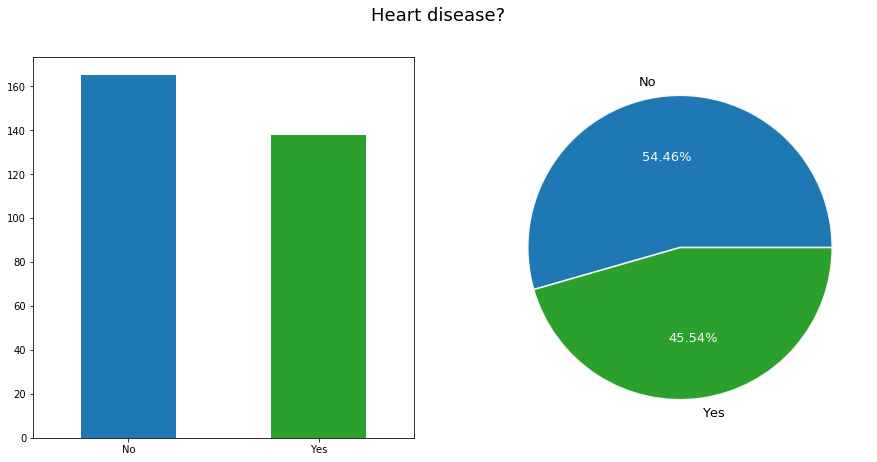

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Heart disease?", fontsize = 18.)
_ = df.target.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.target.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

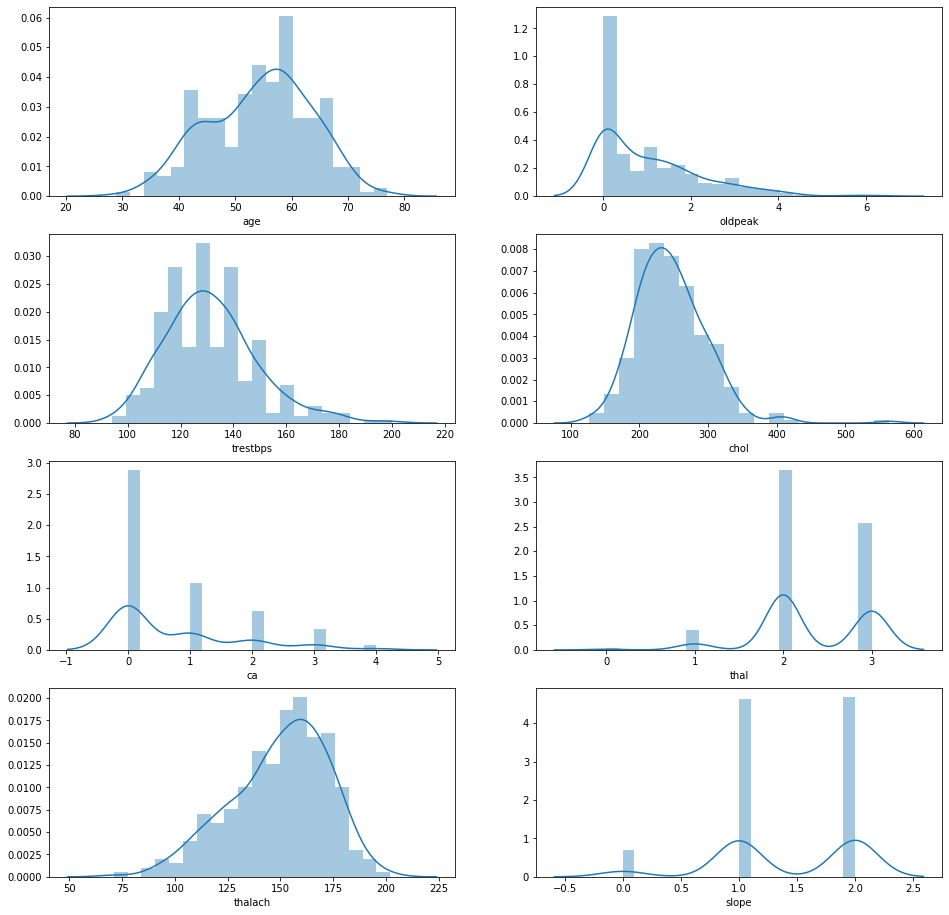

In [10]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.oldpeak, bins = 20, ax=ax[0,1]) 
sns.distplot(df.trestbps, bins = 20, ax=ax[1,0]) 
sns.distplot(df.chol, bins = 20, ax=ax[1,1]) 
sns.distplot(df.ca, bins = 20, ax=ax[2,0])
sns.distplot(df.thal, bins = 20, ax=ax[2,1])
sns.distplot(df.thalach, bins = 20, ax=ax[3,0]) 
sns.distplot(df.slope, bins = 20, ax=ax[3,1]) 
plt.show()

**Correlation between features**

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated

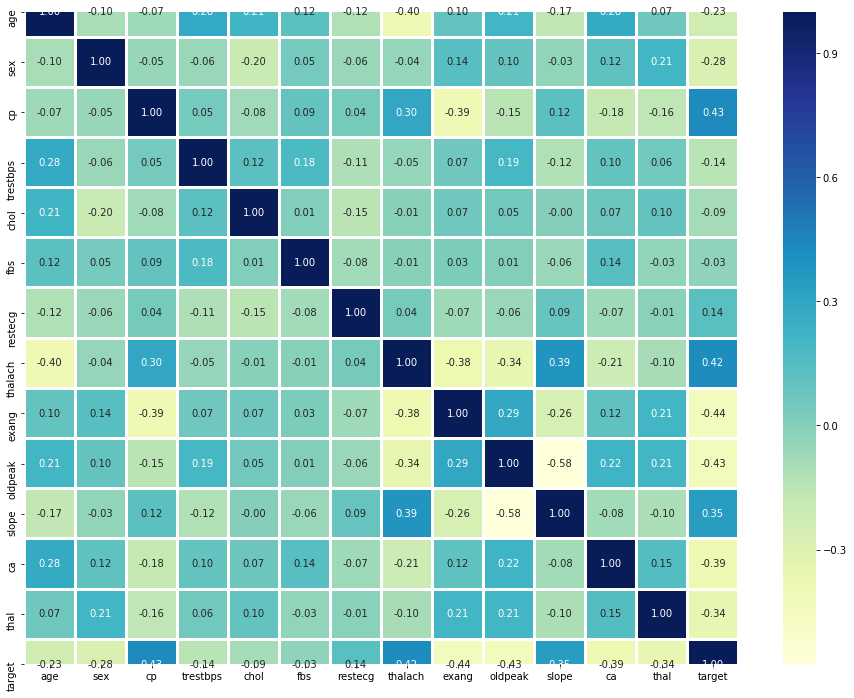

In [11]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Violin Plots**

A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram).

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot clearly shows the presence of different peaks, their position and relative amplitude. This information could not be represented with a simple box plot which only reports summary statistics. The inner part of a violin plot usually shows the mean (or median) and the interquartile range.

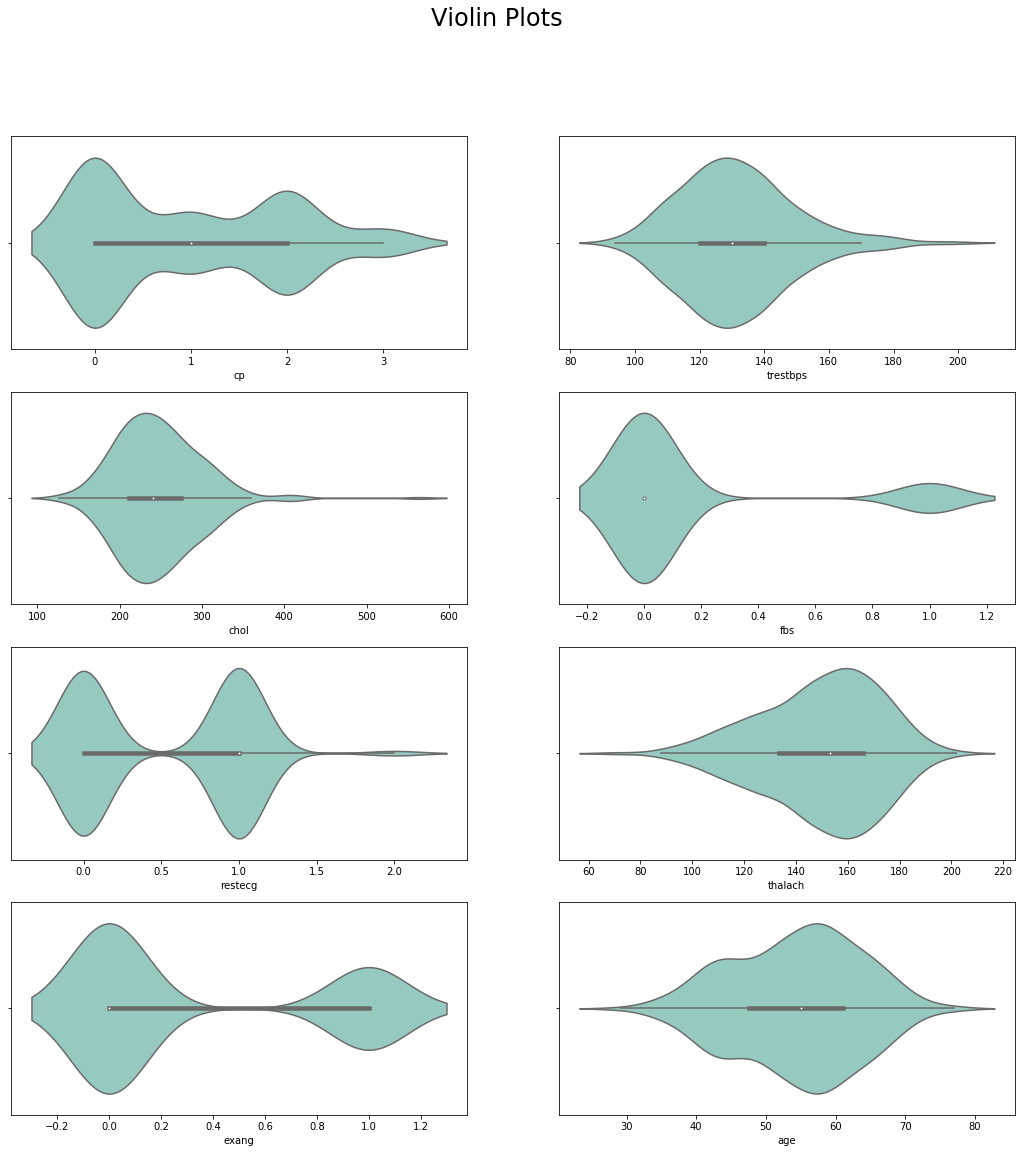

In [13]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="cp", data=df,ax=ax[0,0],palette='Set3')
sns.violinplot(x="trestbps", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='chol', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='fbs', data=df, ax=ax[1,1],palette='Set3')
sns.violinplot(x='restecg', data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x='thalach', data=df, ax=ax[2,1],palette='Set3')
sns.violinplot(x='exang', data=df, ax=ax[3,0],palette='Set3')
sns.violinplot(x='age', data=df, ax=ax[3,1],palette='Set3')
plt.show()

# Predictive modelling 

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Logistic Regression**


Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy  82.89473684210526


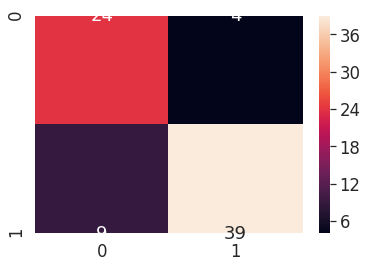

In [15]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

**Decision Tree**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Accuracy  78.94736842105263


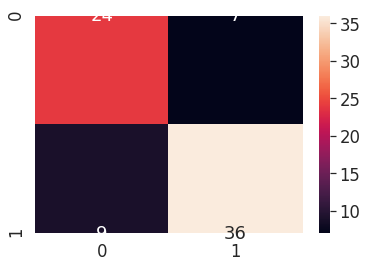

In [16]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [59]:
from sklearn import tree

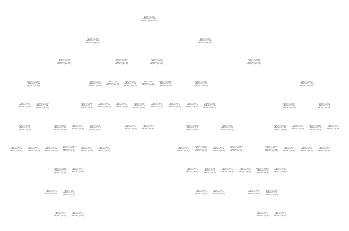

In [63]:
#Plotting the graph
plot=tree.plot_tree(DT.fit(X_train, y_train))

# Partial dependency plot

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [64]:
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]

In [66]:
!pip install -U pdpbox

     |████████████████████████████████| 57.7MB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 440kB 34.6MB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=f7498c95be4117ec4c150c19d0c8470bc9409c9749b67c463c9353ff9c54eafd
  Stored in directory: /home/jovyan/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
  Created wheel for psutil: filename=psutil-5.6.3-cp37-cp37m-linux_x86_64.whl size=277620 sha256=5f1c732d409272add7788ae37e61133b97a8aa2394368f31d4426278f295887d
  Stored in directory: /home/jovyan/.cache/pip/wheels/90/7e/74/bb640d77775e6b6a78bcc3120f9fea4d2a28b2706de1cff37d
Successfully built pdpbox psutil


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


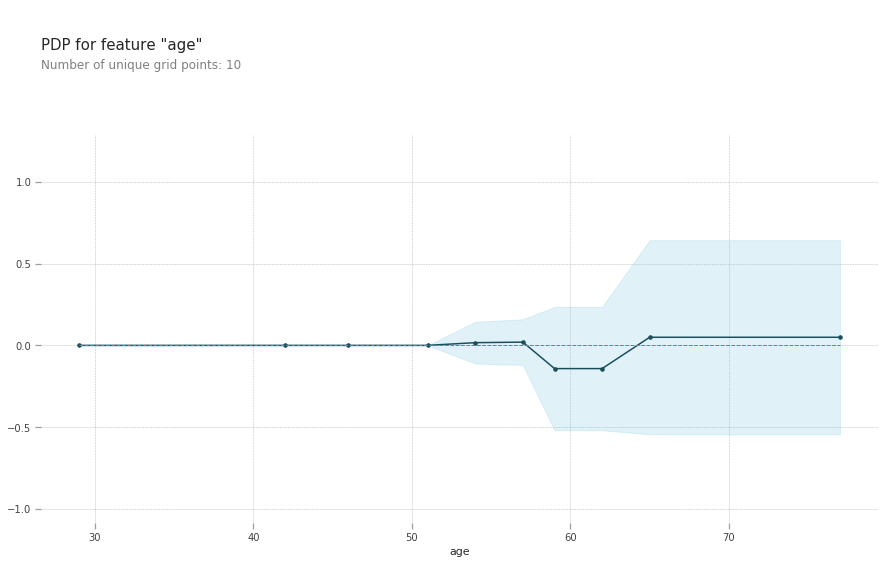

In [67]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=DT, dataset=df, model_features=feature_names, feature='age')

# plot it
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

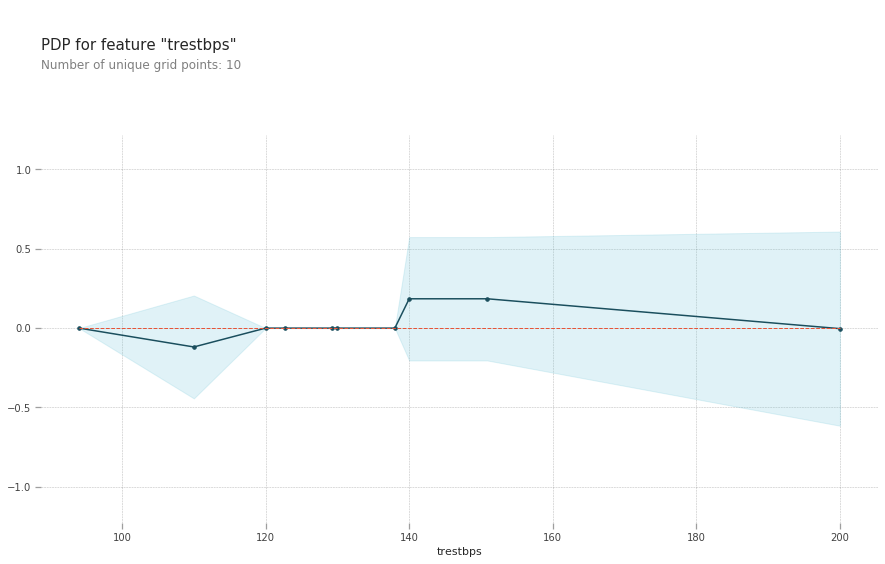

In [68]:
pdp_dist = pdp.pdp_isolate(model=DT, dataset=df, model_features=feature_names, feature='trestbps')

pdp.pdp_plot(pdp_dist, 'trestbps')
plt.show()

This graph seems too simple to represent reality. But that's because the model is so simple. You should be able to see from the decision tree above that this is representing exactly the model's structure.

# 2D Partial Dependence Plots

2D partial dependence plots are very useful to understand interaction between features

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

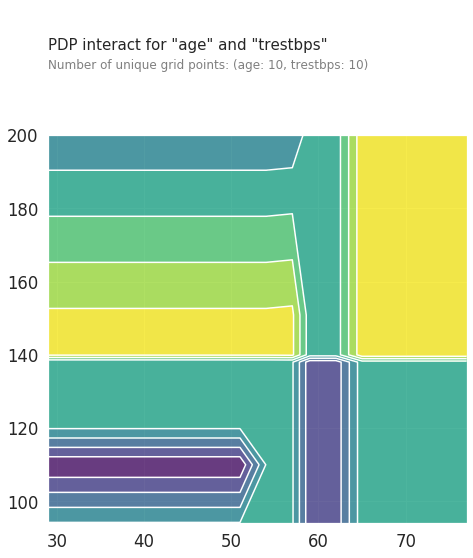

In [69]:
features_to_plot = ['age', 'trestbps']
inter1  =  pdp.pdp_interact(model=DT, dataset=df, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

This graph shows predictions for any combination of age and resting blood pressure. For example, we see the highest predictions when age is around late 50's.

**Gradient Boosting**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Accuracy  80.26315789473685


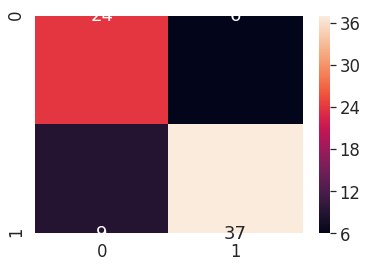

In [70]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

...stay tuned for updates